In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, exp
from scipy.special import hankel1, hankel2
from tqdm import tqdm
from scipy.signal import hilbert

In [2]:
def defwsrc(fmax, dt, lent):
    """
    Definition of the source function
    Ricker wavelet with central frequency fmax/2.5
    Ricker = 2nd-order derivative of a Gaussian function
    """
    fc = fmax / 2.5  # Central frequency
    ns2  = nws + lent # Classical definition
    ns = int((ns2-1)/2)  # Size of the source
    wsrc = np.zeros(ns2)
    for it in range(-ns,ns+1):
        a1 = float(it) * fc * dt * pi
        a2 = a1 ** 2     
        wsrc[it+ns] = (1 - 2 * a2) * exp(-a2)
    if len(wsrc) % 2 == 0 :
        print('The wavelet is even. The wavelet must be odd. \
        There must be the same number of samples on both sides of the maximum value')
    else: 
        print('Wavelet length is odd = ' + str(len(wsrc))+ '. No correction needed' )
        return wsrc

In [3]:
def ana2d(wsrc, dt, r, v0):
    """Analytic 2d solution"""
    # Fourier transform
    wsrcf = np.fft.fft(wsrc)
    nws = len(wsrc)
    aw = 2. * pi * np.fft.fftfreq(nws, dt)

    # Distance and travel time
    t0 = r / v0
    # Hankel function of the first kind
    hk = 1j / 4. * hankel1(0., r / v0 * aw)
    # (1j*aw)**2 = -aw**2 := (i \omega)^2
    anaf = hk * wsrcf
    anaf[0] = 0  # no zero-frequency
    ana = np.real(np.fft.ifft(anaf))
    return ana

In [4]:
def readbin(flnam,nz,nx):
    ''' Read binary file (32 bits) '''
    with open(flnam,"rb") as fl:
        im = np.fromfile(fl, dtype=np.float32)
    im = im.reshape(nz,nx,order='F')
    return im

In [6]:
if __name__ == "__main__":
    print("Start...")

    # Only works for symmetric input wavelet???

    # Read the source function
    fl = 'input/dt141_wsrc.dat'
    nws = 143
    wsrc = readbin(fl, nws, 1)[:, 0]
    ns = (nws - 1) // 2
      
    # Analytic solution
    fmax = 25.
    dt = 0.001
    wsrc = defwsrc(fmax, dt, 0)

    r0 = 180.  # distance in m
    v0 = 2500.  # homogeneous velocity
    ana = ana2d(wsrc, dt, r0, v0)


Start...
Wavelet length is odd = 143. No correction needed


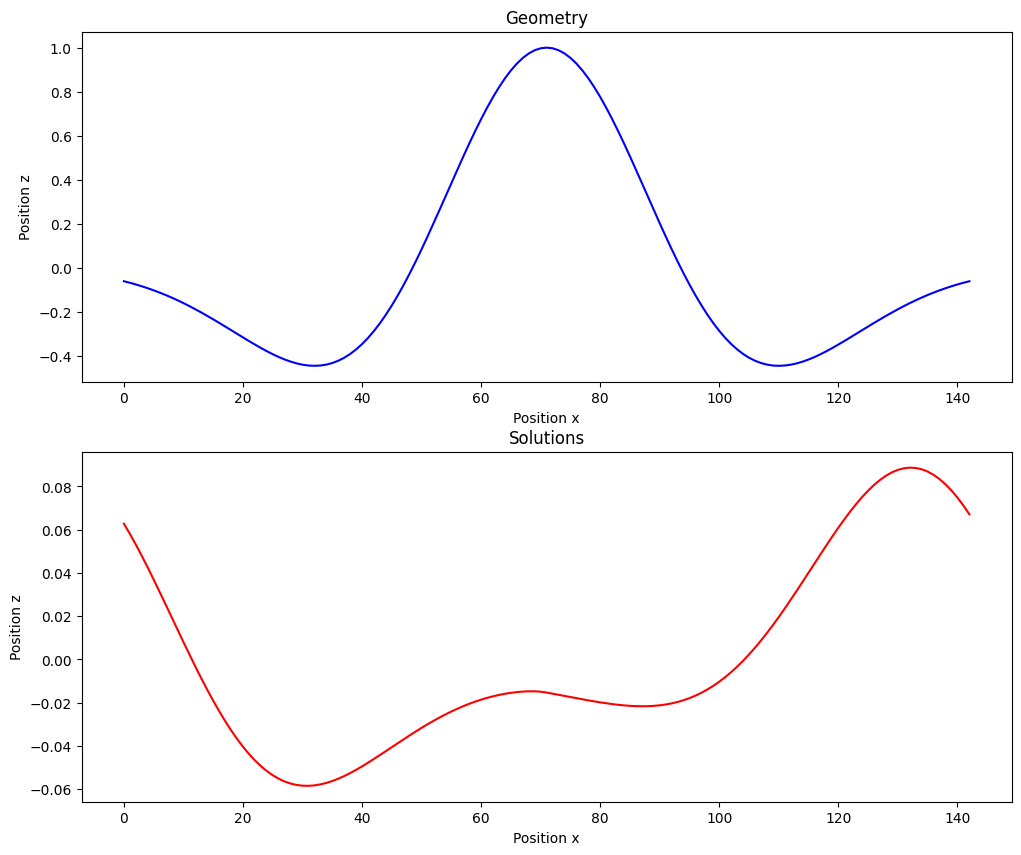

In [11]:
fig = plt.figure(figsize=(12, 10), facecolor="white")
params = {'mathtext.default': 'regular'}
plt.rcParams.update(params)

ax = plt.subplot(2, 1, 1)
plt.plot(wsrc, 'b')
plt.xlabel("Position x")
plt.ylabel("Position z")
plt.title("Geometry")

ax = plt.subplot(2, 1, 2)
# plt.plot(green2d,'b')
plt.plot(ana, 'r')
# plt.plot(green2d-ana,'k')
plt.xlabel("Position x")
plt.ylabel("Position z")
plt.title("Solutions")
plt.show()
fig.savefig("./ana2d_new.png", bbox_inches='tight')